In [1]:
import numpy as np
from scipy import stats as stats
import matplotlib.pyplot as plt
import math


Un objet lointain émet une raie de longueur 656,3 nm
Nous observons cette raie décalée : quel est son redshift?
Pour cela nous devons déterminer la position de la raie observée sur le signal reçu

## Fonctions annexes :

### Calcule la longueur d'onde observée:

In [2]:
def lobs(z,l0):
    lob = z*l0 + l0
    return lob

### Calcule le redshift à partir de la longueur d'onde observée

In [4]:
def redshift(obs, l0):
    redshift = abs(obs - l0)/l0
    return redshift

### Créer n valeurs sur une plage de ini à fin

In [5]:
def lon(ini,fin,n):
    lond = np.linspace(ini, fin, n, retstep = True)
    l = lond[0]
    step = lond[1]
    return l,step

### Calcule la fonction de densité de probabilité sur une plage longueur d'un signal centré sur centre et de déviation dev 

In [6]:
def pdf(longueur, centre, dev):
    y = stats.norm.pdf(longueur,centre, dev)
    return y
    

### Corrélations croisées entre des vraies données et un signal modèle

In [7]:
def cross(ymodel,ysig):
        sizemod = np.size(ymodel)
        sizesig = np.size(ysig)
        
        prod = []
    
        for i in range(sizesig-sizemod):
            p = np.dot(ymodel,ysig[i:(i+sizemod)])
            prod.append(p)
        return prod

## Fonction principale calculant le signal sur bruit
### En argument: l'amplitude du signal, l'écart-type du signal, l'amplitude du bruit

In [9]:
def traitement_signal_simple(obs, amp_signal, dev_signal, amp_bruit):
    
    """ Création du signal """
    
    l,step = lon(600,1400,1000)
    
    
    dev = dev_signal*0.01*obs
    
    """ DONNEES """
    
    ysig = amp_signal*pdf(l,obs,dev)
    
    plt.plot(l,ysig)
    plt.title("Signal seul")
    plt.xlabel("Longueur d'onde en nm")
    plt.ylabel("Pdf du signal")
    plt.show()
    
    
    bruit = amp_bruit*np.random.normal(0,1,1000)
    plt.plot(l,bruit)
    plt.title("Bruit blanc gaussien")
    plt.xlabel("Longueur d'onde en nm")
    plt.ylabel("Déviation standard")
    plt.show()
    
    data = ysig + bruit
    
    plt.plot(l,data)
    plt.title("Signal + bruit")
    plt.xlabel("Longueur d'onde en nm")
    plt.ylabel("Déviation standard")
    plt.show()
    
    
    """ MODELS: Du signal et du bruit """
    
    lmod,step = lon(0,60*step,60)
    ymodel = pdf(lmod,(step*60/2),8)
    
    bruitmod = amp_bruit*np.random.normal(0,1,1000)
    
    """ TRAITEMENT DU SIGNAL """
    
    # Corrélations croisées modèle/données
    prodat = cross(ymodel,data)
    
    # Corrélations croisées modèle/bruit
    prodbruit = cross(ymodel,bruitmod)
    
    
    devbr = np.std(prodbruit)
    SNR = prodat/devbr
    
    plt.plot(SNR)
    plt.title("Signal sur bruit")
    plt.show()
    return SNR
 

## Fonction traitement le signal-sur-bruit:
### Détecte un signal seulement au-dessus de 3 sigma

In [10]:
def traitement_SNR(obs, SNR):
    
    SNR = SNR[SNR>3]
    
    if not np.any(SNR):
        print("Pas de signal détecté")
        return 0
        
    index = np.argmax(SNR[SNR>3]) 
    index+= 30
    print(index)
    
    l,step = lon(600,1400,1000)
    l_found = l[index]
    print("la longueur d'onde trouvée:", l_found)
    z = redshift(obs, l_found)
    print("Le redshift trouvé:" ,z)
    
    return 0

## Données initiales:

In [11]:
l0 = 656.3
z = np.random.uniform(0.0,1.0)
obs = lobs(z,l0)
print("La longueur d'onde émise est :", l0, "nm")
print("Pour z = ", z, "la longueur d'onde observee sera", obs,"nm")

print("On cherche à retrouver le redshift à partir d'un signal de la longueur d'onde observée")


La longueur d'onde émise est : 656.3 nm
Pour z =  0.3114926332286584 la longueur d'onde observee sera 860.7326151879685 nm
On cherche à retrouver le redshift à partir d'un signal de la longueur d'onde observée


## Traitement d'un signal simple pour 4 cas:

## Cas initial:

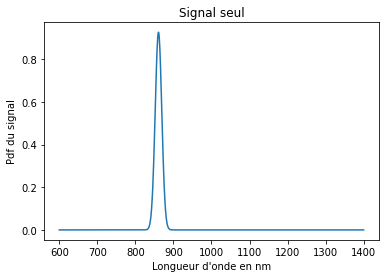

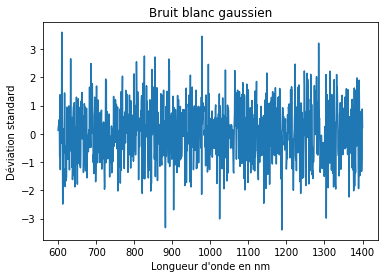

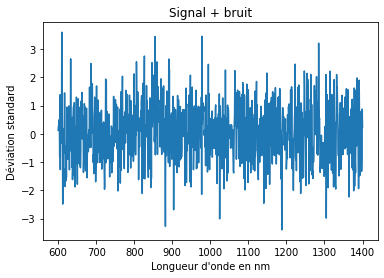

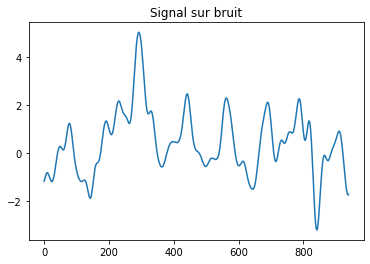

45
la longueur d'onde trouvée: 636.0360360360361
Le redshift trouvé: 0.35327649130119676


0

In [13]:
SNR = traitement_signal_simple(obs, 20, 1, 1)
traitement_SNR(obs, SNR)

## Cas où l'on augmente l'amplitude du signal:

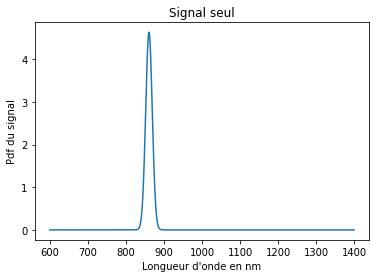

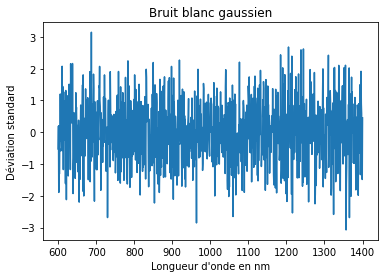

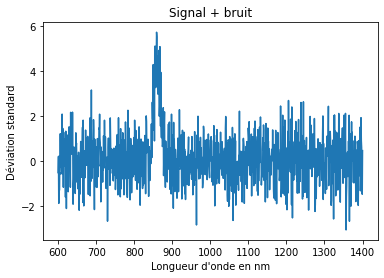

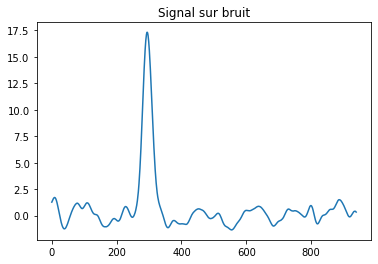

55
la longueur d'onde trouvée: 644.0440440440441
Le redshift trouvé: 0.336449926286572


0

In [14]:
SNR = traitement_signal_simple(obs, 100, 1, 1)
traitement_SNR(obs, SNR)

## Cas où l'on diminue l'écart-type du signal:

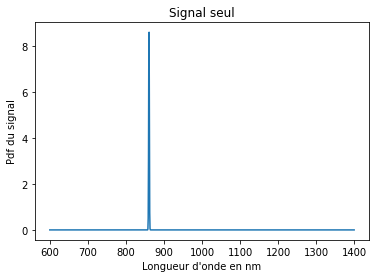

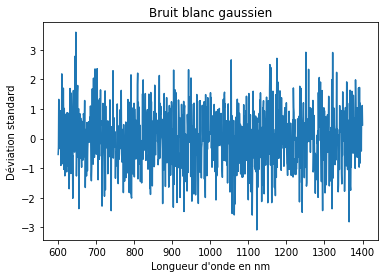

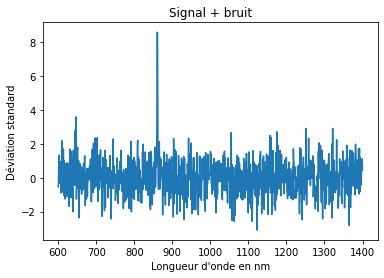

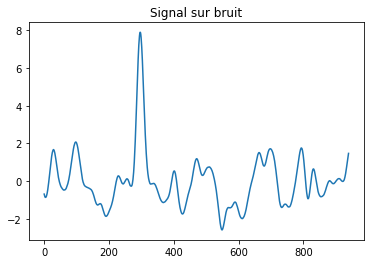

43
la longueur d'onde trouvée: 634.4344344344345
Le redshift trouvé: 0.35669277780495495


0

In [15]:
SNR = traitement_signal_simple(obs, 20, 0.1, 1)
traitement_SNR(obs, SNR)

## Cas où l'on augmente le bruit:

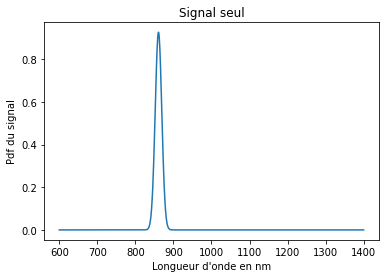

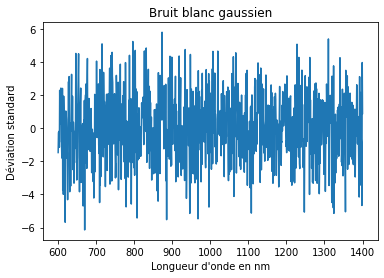

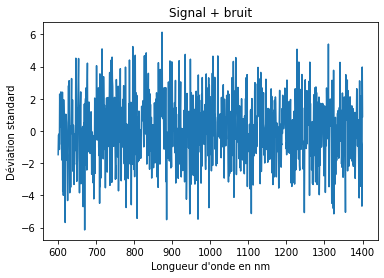

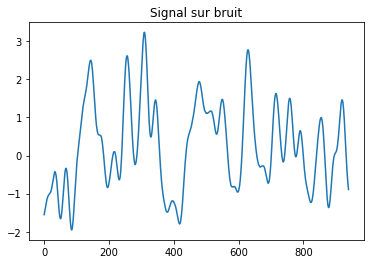

33
la longueur d'onde trouvée: 626.4264264264265
Le redshift trouvé: 0.3740362457219246


0

In [16]:
SNR = traitement_signal_simple(obs, 20, 1, 2)
traitement_SNR(obs, SNR)

## En conclusion:
La détection est meilleure pour un bruit faible, une amplitude du signal haute, et une déviation standard du signal faible")
